In [1]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import sys
import subprocess

In [2]:
#<dimensions and data>
x_low = 0
x_high = 1
x_num = 100

mistake_num_max = 100
mistake_num_min = 20

# non equal
x_data = np.zeros (2 * x_num)
h = (x_high - x_low) / (x_num - 1)
i = 1
x_data[0] = x_low
while True:
    x_data[i] = x_data[i - 1] + random.random () * h + h / 2
    if x_data[i] > x_high:
        x_data[i] = x_high
        x_num = i + 1
        break
    i = i + 1
x_data = np.resize (x_data, (x_num))

# equal distancies
#x_data = np.linspace (x_low, x_high, x_num)
#</dimensions and data>

In [3]:
#<equations>

# -k*y'' + v*y' = f(x)
# y = sin(pix)
# v = cos(x) + 2 > 0
# f = -kpi^2sin(pix) + picos(x)cos(pix) + 2picos (pix)

def y_ref (x_data):
    return np.sin (math.pi * x_data)

k_const = 1 # but will work with array for future
k = np.zeros (x_num)
for i in range (0, x_num):
    k[i] = 0.1

def v_func (x_data):
    return (np.cos (x_data) + 2) #velocity > 0
v = v_func (x_data)

def f_func (x_data):
    return k * math.pi * math.pi * np.sin (math.pi * x_data) + v * math.pi * np.cos (math.pi * x_data);
f = f_func (x_data)

# ai*y[i] - bii1*y[i + 1] - bii_1*y[i - 1] = f[i]

#<useful consts>
def vi12 (i):
    return (v[i + 1] + v[i]) / 2

def vi_12 (i):
    return (v[i - 1] + v[i]) / 2

def ki12 (i):
    return (k[i + 1] + k[i]) / 2

def ki_12 (i):
    return (k[i - 1] + k[i]) / 2

def dii1 (i):
    return (x_data[i + 2] - x_data[i]) / 2

def dii_1 (i):
    return (x_data[i + 1] - x_data[i - 1]) / 2

def hi (i):
    return (x_data[i + 1] - x_data[i])

def hi_1 (i):
    return (x_data[i] - x_data[i - 1])
#</useful consts>

#<C1 case>
def ai (i):
    return 1 / hi (i) * ((-vi12 (i) + vi_12 (i)) / 2 + ki12 (i) / dii1 (i) + ki_12 (i) / dii_1 (i))

def bii1 (i):
    return -1 / hi (i) * ((vi12 (i)) / 2 - ki12 (i) / dii1 (i))

def bii_1 (i):
    return 1 / hi (i) * ((vi_12 (i)) / 2 + ki_12 (i) / dii_1 (i))
#</C1 case>

#<C2 case>
#def ai (i):
#    return 1 / dii_1 (i) * ((vi12 (i) - vi_12 (i)) / 2 + ki12 (i) / hi (i) + ki_12 (i) / hi_1 (i))
#</C2 case>

#</equations>

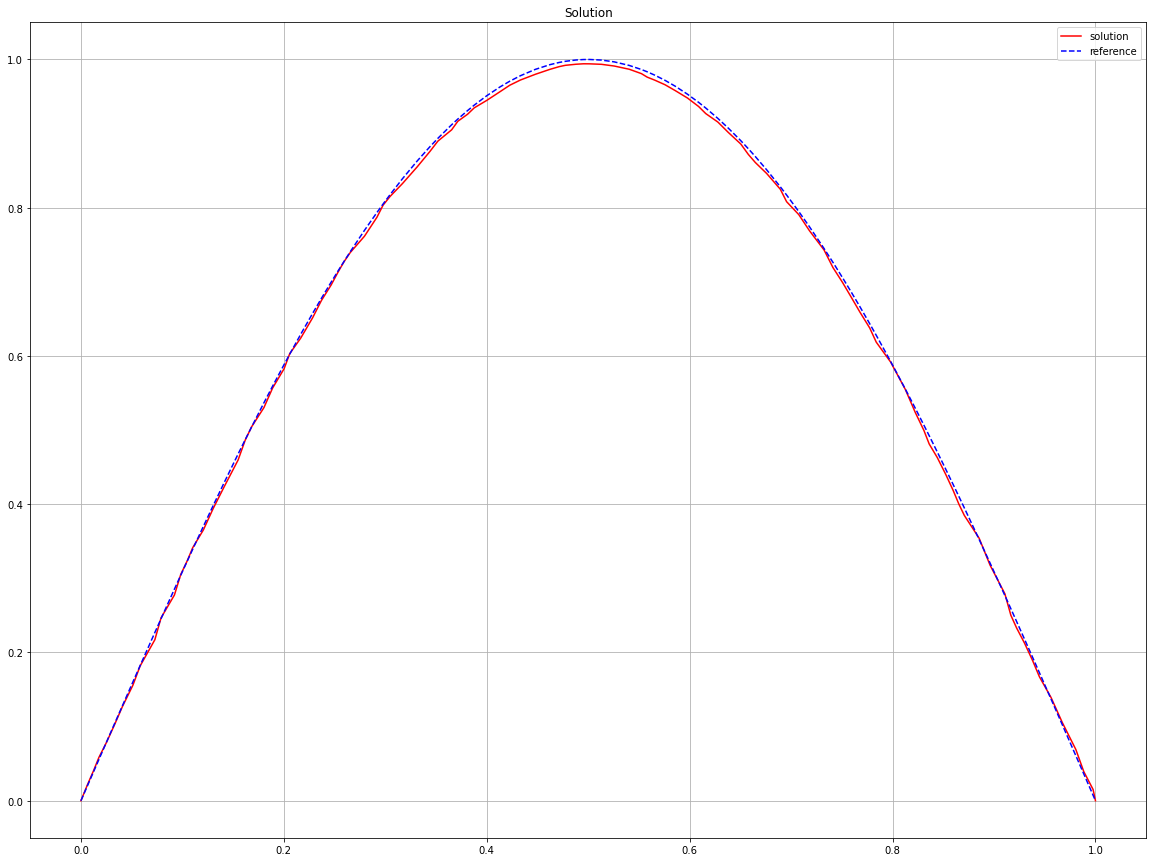

In [4]:
#<solution>
# we have edge task: y[0] = y[N] = 0
def solve (x_data):
    x_num = x_data.size
    matrix_n_2 = np.zeros ((x_num - 2, x_num - 2))
    matrix_n_2[0][0] = ai (1)
    matrix_n_2[0][1] = -bii1 (1)
    for i in range (1, x_num - 3):
        matrix_n_2[i][i-1] = -bii_1 (i)
        matrix_n_2[i][i] = ai (i)
        matrix_n_2[i][i+1] = -bii1 (i)
    matrix_n_2[x_num - 3][x_num - 3 - 1] = -bii_1 (x_num - 3)
    matrix_n_2[x_num - 3][x_num - 3] = ai (x_num - 3)
    c_input = str (x_num - 2) + "\n"
    for i in range (0, x_num - 2):
        for j in range (0, x_num - 2):
            c_input = c_input + str (matrix_n_2[i][j]) + " "
        c_input = c_input + str (f[i + 1]) + "\n"
    #print (c_input)
    result = subprocess.run (["./solve_3_daig"], input=c_input, capture_output=True, text=True)
    y = np.zeros (x_num)
    res_split = result.stdout.split ()
    for i in range (1, x_num - 1):
        y[i] = res_split[i - 1]
    return y

plt.rcParams["figure.figsize"] = (20,15)
plt.grid (True)
plt.title ("Solution")
plt.plot (x_data, solve (x_data), "r-", label="solution")
plt.plot (x_data, y_ref (x_data), "b--", label="reference")
#plt.plot (x_data, f, "b.", label="f")
plt.legend()
plt.show()
#</solution>